In [1]:
#Importing all the required libraries
import requests
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
#Declaring the API key used for accessing the census data
api_key = 'f48e2ab46e6f82dbfc135a216566d48930834be5'

In [3]:
#function to convert the received json response into a dataframe
def json_to_df(response):
  return pd.DataFrame(response.json()[1:], columns= response.json()[0])

In [4]:
#fetching the required data from api.census.gov using API call
state_url = "https://api.census.gov/data/2021/pep/population?get=NAME,POP_BASE2020,POP_2021,RANK_POP_2021,NPOPCHG_CUM2021,RANK_NPOPCHG_CUM2021,PPOPCHG_CUM2021,RANK_PPOPCHG_CUM2021&for=state:*&key={0}".format(api_key)
response = requests.request("GET", state_url)

#calling the function to convert the json response to a structured format
df_pop_stats = json_to_df(response)

In [5]:
#renaming the columns for better understanding and referencing
new_columns = {'NAME': 'State', 'POP_BASE2020': 'Base Population-2020', 'POP_2021': 'Population Estimate-2021', "RANK_POP_2021": "Estimated pop rank-2021", "NPOPCHG_CUM2021": "Numeric population change", "RANK_NPOPCHG_CUM2021": "Numeric pop change rank", "PPOPCHG_CUM2021": "Percent population change", "RANK_PPOPCHG_CUM2021": "Percent pop change rank"}
df_pop_stats.rename(columns=new_columns, inplace=True)

#dropping columns that are not required
col_to_drop = ['state']
df_pop_stats.drop(columns=col_to_drop, inplace=True)

#Converting percent population change column values into integer format
df_pop_stats['Percent population change'] = pd.to_numeric(df_pop_stats['Percent population change'], errors='coerce')


In [6]:
#displaying some of the top records of the dataframe created
df_pop_stats.head(8)

,State,Base Population-2020,Population Estimate-2021,Estimated pop rank-2021,Numeric population change,Numeric pop change rank,Percent population change,Percent pop change rank
0,Oklahoma,3959353,3986639,28,27286,13,0.689153,16
1,Nebraska,1961504,1963692,37,2188,29,0.111547,27
2,Hawaii,1455271,1441553,40,-13718,41,-0.942642,48
3,South Dakota,886667,895376,46,8709,24,0.982218,11
4,Tennessee,6910840,6975218,16,64378,8,0.931551,12
5,Nevada,3104614,3143991,32,39377,10,1.268338,8
6,New Mexico,2117522,2115877,36,-1645,34,-0.077685,33
7,Iowa,3190369,3193079,31,2710,26,0.084943,28


In [7]:
df_pop_stats.describe()

,Percent population change
count,52.000000
mean,0.244074
std,0.994728
min,-2.827227
25%,-0.242323
50%,0.118805
75%,0.821778
max,3.361253


In [8]:
df_pop_stats.isnull().sum()

State                        0
Base Population-2020         0
Population Estimate-2021     0
Estimated pop rank-2021      1
Numeric population change    0
Numeric pop change rank      1
Percent population change    0
Percent pop change rank      1
dtype: int64

In [9]:
#retrieving the column names of the dataframe
df_pop_stats.columns

Index(['State', 'Base Population-2020', 'Population Estimate-2021',
       'Estimated pop rank-2021', 'Numeric population change',
       'Numeric pop change rank', 'Percent population change',
       'Percent pop change rank'],
      dtype='object')

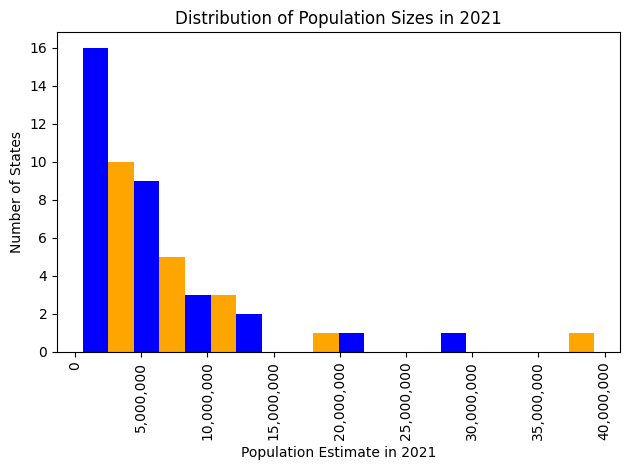

In [10]:
# Assuming 'Population Estimate-2021' might contain non-numeric data, converting it to numeric
# and coercing any non-numeric values to NaN, then dropping them
df_pop_stats['Population Estimate-2021'] = pd.to_numeric(df_pop_stats['Population Estimate-2021'], errors='coerce')
df_pop_stats = df_pop_stats.dropna(subset=['Population Estimate-2021'])

# Now that we have ensured the column is numeric, let's remove any infinite values
us_data = df_pop_stats[np.isfinite(df_pop_stats['Population Estimate-2021'])]

# Define two colors to alternate between
colors = ['blue', 'orange']

# Plot the histogram with alternate colors
n, bins, patches = plt.hist(df_pop_stats['Population Estimate-2021'], bins=20)

# Set the colors for each bin
for bin_index, patch in enumerate(patches):
    plt.setp(patch, 'facecolor', colors[bin_index % len(colors)])  # Alternate colors

plt.title('Distribution of Population Sizes in 2021')
plt.xlabel('Population Estimate in 2021')
plt.ylabel('Number of States')

# Format the x-axis labels with commas for thousands
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=90)  # Rotate the x-axis labels to avoid overlap
plt.tight_layout()  # Adjust the layout
plt.show()




In [11]:
# Print out the unique identifiers to check them
print(df_pop_stats['State'].unique())


['Oklahoma' 'Nebraska' 'Hawaii' 'South Dakota' 'Tennessee' 'Nevada'
 'New Mexico' 'Iowa' 'Kansas' 'District of Columbia' 'Texas' 'Missouri'
 'Arkansas' 'Michigan' 'New Hampshire' 'North Carolina' 'Ohio'
 'South Carolina' 'Wyoming' 'California' 'North Dakota' 'Louisiana'
 'Maryland' 'Delaware' 'Pennsylvania' 'Georgia' 'Oregon' 'Minnesota'
 'Colorado' 'New Jersey' 'Kentucky' 'Washington' 'Maine' 'Vermont' 'Idaho'
 'Indiana' 'Montana' 'New York' 'Puerto Rico' 'Connecticut' 'Florida'
 'Virginia' 'Massachusetts' 'Illinois' 'Mississippi' 'Arizona' 'Utah'
 'Wisconsin' 'Alabama' 'West Virginia' 'Rhode Island' 'Alaska']


In [12]:
#code for plotting the Growth Rate Change across US states using plotly

df_pop_stats['Population Estimate-2021'] = pd.to_numeric(df_pop_stats['Population Estimate-2021'], errors='coerce')
df_pop_stats['Base Population-2020'] = pd.to_numeric(df_pop_stats['Base Population-2020'], errors='coerce')

#calculating growth rate change by finding the difference between the estimated population in 2021 and base population in 2020
df_pop_stats['Growth_Rate_Change'] = df_pop_stats['Population Estimate-2021'] - df_pop_stats['Base Population-2020']

# Ensuring 'Growth_Rate_Change' is numeric
df_pop_stats['Growth_Rate_Change'] = pd.to_numeric(df_pop_stats['Growth_Rate_Change'], errors='coerce')

# Mapping state names to state abbreviations, necessary for plotly visualizations
state_name_to_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


# Creating a new column for state codes from state names
df_pop_stats['State_Code'] = df_pop_stats['State'].map(state_name_to_code)
custom_coolwarm = [
    [0.0, 'rgb(165,0,38)'],        # cool (low)
    [0.5, 'rgb(255,255,255)'],     # middle
    [1.0, 'rgb(49,54,149)']        # warm (high)
]

# Now plotting the choropleth map
fig = px.choropleth(
    df_pop_stats,
    locations='State_Code',  # Use the new column with state codes
    locationmode='USA-states',
    color='Growth_Rate_Change',
    scope='usa',
    hover_name='State',  # State full names for hover text
    color_continuous_scale=custom_coolwarm,
    title='Growth Rate Change from 2020 to 2021 by State'
)

# Updating the layout for a cleaner look
fig.update_layout(
    geo=dict(
        lakecolor='white',  # Set lake color to white
        showlakes=True,  # Show lakes on the map
        landcolor='lightgray'  # Set land color to light gray
    ),
    margin=dict(l=0, r=0, t=50, b=0)  # Adjust margins to optimize space
)

fig.show()

In [13]:
# Creating a bar chart for States vs Percent Population Change
fig = px.bar(
    df_pop_stats,
    x='State',
    y='Percent population change',
    title='Percent Population Change by State (2020-2021)',
    labels={'Percent population change': 'Percent Population Change (%)'},
    color='Percent population change',
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.show()

In [14]:
#fetching the required data from api.census.gov using API call
month_pop_url = "https://api.census.gov/data/2021/pep/natmonthly?get=NAME,POP,MONTHLY,MONTHLY_DESC,UNIVERSE,UNIVERSE_DESC&for=us:*&key={0}".format(api_key)
response = requests.request("GET", month_pop_url)

#calling the function to convert the json response to a structured format
df_monthly = json_to_df(response)

In [15]:
#renaming the columns for better understanding and referencing

new_columns = {'POP': 'Population', 'MONTHLY_DESC': 'MONTH', "UNIVERSE_DESC": "Population Type", "UNIVERSE": "Pop_label"}
df_monthly.rename(columns=new_columns, inplace=True)

#dropping columns that are not required

col_to_drop = ['NAME', 'MONTHLY', 'us']
df_monthly.drop(columns=col_to_drop, inplace=True)


In [16]:
#extracting the date part from MONTH column and converting it into datetime format

df_monthly['MONTH'] = df_monthly['MONTH'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')

df_monthly['MONTH'] = pd.to_datetime(df_monthly['MONTH'], format='%m/%d/%Y')

In [17]:
#displaying top 10 records of the dataframe created
df_monthly.head(10)

,Population,MONTH,Pop_label,Population Type
0,330351030,2020-04-01,C,Civilian population
1,323688422,2020-04-01,H,Household population
2,326734458,2020-04-01,N,Civilian noninstitutionalized population
3,331693822,2020-04-01,P,Resident population plus Armed Forces overseas
4,331449281,2020-04-01,R,Resident population
5,330328916,2020-05-01,C,Civilian population
6,323661571,2020-05-01,H,Household population
7,326712344,2020-05-01,N,Civilian noninstitutionalized population
8,331665390,2020-05-01,P,Resident population plus Armed Forces overseas
9,331422430,2020-05-01,R,Resident population


In [18]:
#creating a pivot to get the population records for different population types over time

pivoted_df = df_monthly.pivot(index='MONTH', columns='Population Type', values='Population').reset_index()
for col in pivoted_df.select_dtypes(include=['object']).columns:
    pivoted_df[col] = pd.to_numeric(pivoted_df[col], errors='coerce')

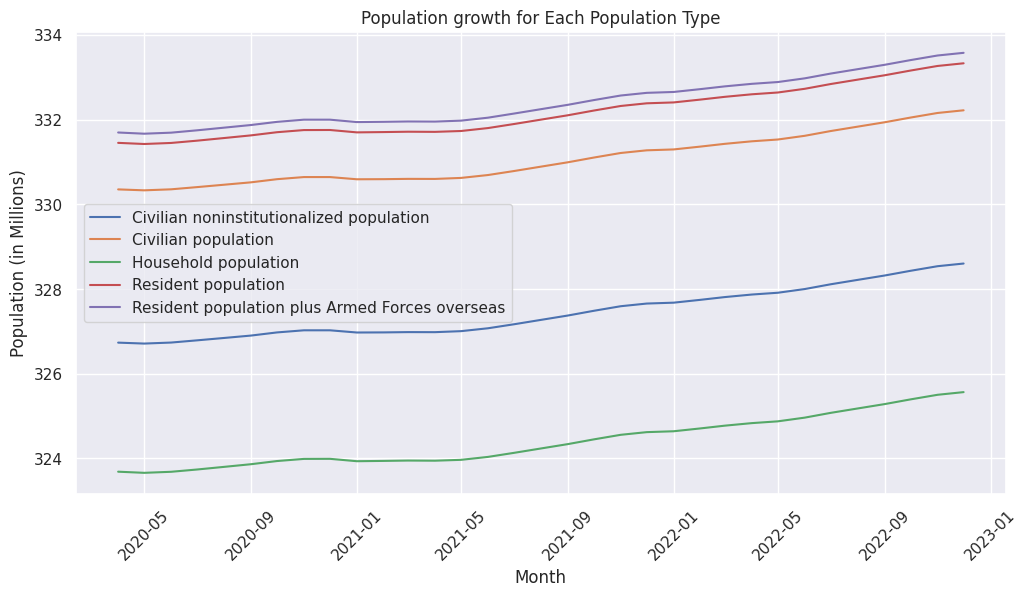

In [19]:
#plotting a time-series graph for visualizing the variation of population over time for different population categories
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
population_types = list(pivoted_df.columns[1:])
for column in population_types:
    sns.lineplot(x=pivoted_df["MONTH"], y=pivoted_df[column]/1000000, label=column)

plt.title('Population growth for Each Population Type')
plt.xlabel('Month')
plt.ylabel('Population (in Millions)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

---------------------------------------------------------

In [20]:
#fetching the required data from api.census.gov using API call
deccenial_stats_url_occ = "https://api.census.gov/data/2020/dec/dhc?get=group(H3)&for=state:*&key={0}".format(api_key)
response = requests.request("GET", deccenial_stats_url_occ)

#calling the function to convert the json response to a structured format
house_occupancy_stats = json_to_df(response)


In [21]:
#dropping columns that are not required

col_to_drop = ['H3_001NA', 'H3_002NA', 'H3_003NA','GEO_ID']
house_occupancy_stats.drop(columns=col_to_drop, inplace=True)

#renaming the columns for better understanding and referencing

new_cols = {'NAME': 'State', 'H3_001N': 'Total Households', 'H3_002N': 'Occupied', 'H3_003N': 'Vacant', 'state': 'State Code'}
house_occupancy_stats.rename(columns=new_cols, inplace=True)

In [22]:
#displaying top 10 records for the dataframe created
house_occupancy_stats.head(10)

,State,Total Households,Occupied,Vacant,State Code
0,Connecticut,1530197,1418069,112128,09
1,Delaware,448735,386375,62360,10
2,District of Columbia,350364,312448,37916,11
3,Florida,9865350,8529067,1336283,12
4,Georgia,4410956,4020808,390148,13
5,Hawaii,561066,490267,70799,15
6,Idaho,751859,676206,75653,16
7,Illinois,5426429,4998395,428034,17
8,Indiana,2923175,2667542,255633,18
9,Iowa,1412789,1288560,124229,19


In [23]:
#fetching the required data from api.census.gov using API call
deccenial_stats_url_sex = "https://api.census.gov/data/2020/dec/dhc?get=group(P12)&for=state:*&key={0}".format(api_key)
response = requests.request("GET", deccenial_stats_url_sex)

#calling the function to convert the json response to a structured format
pop_by_sex_stats = json_to_df(response)

In [24]:
#selecting only the required columns from the dataframe retrieved above
pop_by_sex_stats = pop_by_sex_stats[['NAME', 'P12_001N', 'P12_002N', 'P12_026N']]

#renaming the columns for better understanding and referencing

new_columns = {'NAME': 'State', 'P12_001N': 'Total Population', "P12_002N": "Males", "P12_026N": "Females"}
pop_by_sex_stats.rename(columns=new_columns, inplace=True)


In [25]:
#displaying top 10 results from the dataframe created above
pop_by_sex_stats.head(10)

,State,Total Population,Males,Females
0,Connecticut,3605944,1749853,1856091
1,Delaware,989948,476719,513229
2,District of Columbia,689545,322777,366768
3,Florida,21538187,10464234,11073953
4,Georgia,10711908,5188570,5523338
5,Hawaii,1455271,727844,727427
6,Idaho,1839106,919196,919910
7,Illinois,12812508,6283130,6529378
8,Indiana,6785528,3344660,3440868
9,Iowa,3190369,1586092,1604277


In [26]:
#fetching the required data from api.census.gov using API call
deccenial_stats_url_race = "https://api.census.gov/data/2020/dec/dhc?get=group(P3)&for=state:*&key={0}".format(api_key)
response = requests.request("GET", deccenial_stats_url_race)

#calling the function to convert the json response to a structured format
pop_by_race_stats = json_to_df(response)

In [27]:
#dropping columns that are not required

col_to_drop = ['P3_001N', 'P3_001NA', 'P3_002NA', 'P3_003NA', 'P3_004NA', 'P3_005NA', 'P3_006NA', 'P3_007NA', 'P3_008NA','state','GEO_ID']
pop_by_race_stats.drop(columns=col_to_drop, inplace=True)

#renaming the columns for better understanding and referencing

new_cols = {'NAME': 'State','P3_002N':'White', 'P3_003N': 'Black/African', 'P3_004N': 'American Indian and Alaska Native', 'P3_005N': 'Asian', 'P3_006N': 'Native Hawaiian and Other Pacific Islander', 'P3_007N': 'Other', 'P3_008N': 'Two or more races'}
pop_by_race_stats.rename(columns=new_cols, inplace=True)

In [28]:
#displaying top 10 results from the dataframe above
pop_by_race_stats.head(10)

,State,White,Black/African,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more races
0,Connecticut,2395128,388675,16051,172455,1598,299133,332904
1,Delaware,597763,218899,5148,42699,412,48509,76518
2,District of Columbia,273194,285810,3193,33545,432,37294,56077
3,Florida,12422961,3246381,94795,643682,14014,1564282,3552072
4,Georgia,5555483,3320513,50618,479028,7299,555059,743908
5,Hawaii,333261,23417,4370,541902,157445,26747,368129
6,Idaho,1510360,15726,25621,26836,3726,103632,153205
7,Illinois,7868227,1808271,96498,754878,4501,1135149,1144984
8,Indiana,5241795,648513,26086,167959,3137,261312,436726
9,Iowa,2694521,131972,14486,75629,5758,88720,179283


In [29]:
#fetching the required data from api.census.gov using API call
deccenial_stats_url_area = "https://api.census.gov/data/2020/dec/dhc?get=group(H2)&for=state:*&key={0}".format(api_key)
response = requests.request("GET", deccenial_stats_url_area)

#calling the function to convert the json response to a structured format
pop_by_area = json_to_df(response)

In [30]:
#dropping columns that are not required

col_to_drop = ['H2_001N', 'H2_001NA', 'H2_002NA', 'H2_003NA', 'H2_004N', 'H2_004NA','state','GEO_ID']
pop_by_area.drop(columns=col_to_drop, inplace=True)

#renaming the columns for better understanding and referencing

new_cols = {'NAME': 'State','H2_002N':'Urban', 'H2_003N': 'Rural'}
pop_by_area.rename(columns=new_cols, inplace=True)


In [31]:
#displaying top 10 records from the dataframe created above
pop_by_area.head(10)

,State,Urban,Rural
0,Connecticut,1323191,207006
1,Delaware,378613,70122
2,District of Columbia,350364,0
3,Florida,9071943,793407
4,Georgia,3236998,1173958
5,Hawaii,475469,85597
6,Idaho,502775,249084
7,Illinois,4685875,740554
8,Indiana,2104049,819126
9,Iowa,891330,521459


In [32]:
#merging all the dataframes created above to get a consolidated dataset for further analysis

merged_df1 = pd.merge(house_occupancy_stats,pop_by_sex_stats, on='State', how='inner')
merged_df2 = pd.merge(merged_df1, pop_by_area, on='State', how='inner')
merged_df = pd.merge(merged_df2, pop_by_race_stats, on='State', how='inner')


In [33]:
#displaying the descriptive statistics for the merged dataframe
merged_df.describe()

,State,Total Households,Occupied,Vacant,State Code,Total Population,Males,Females,Urban,Rural,White,Black/African,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more races
count,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
unique,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
top,Connecticut,1530197,1418069,112128,09,3605944,1749853,1856091,1323191,207006,2395128,388675,16051,172455,1598,299133,332904
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


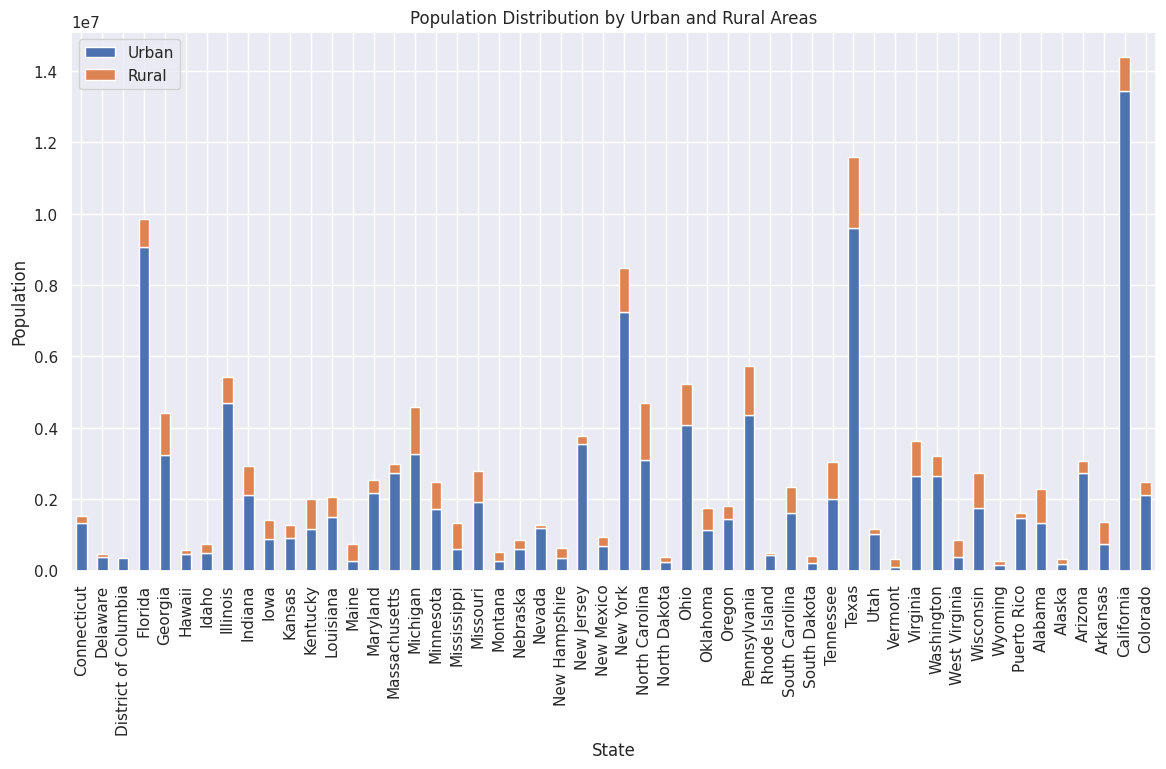

In [34]:
#plotting the urban and rural population records for all the states across the USA

merged_df['Urban'] = pd.to_numeric(merged_df['Urban'], errors='coerce')
merged_df['Rural'] = pd.to_numeric(merged_df['Rural'], errors='coerce')
merged_df.set_index('State', inplace=True)

merged_df[['Urban', 'Rural']].plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Population Distribution by Urban and Rural Areas')
plt.xlabel('State')
plt.ylabel('Population')
plt.show()


In [35]:
#resetting the index to perform indexing functions in further analysis
merged_df.reset_index(inplace=True)


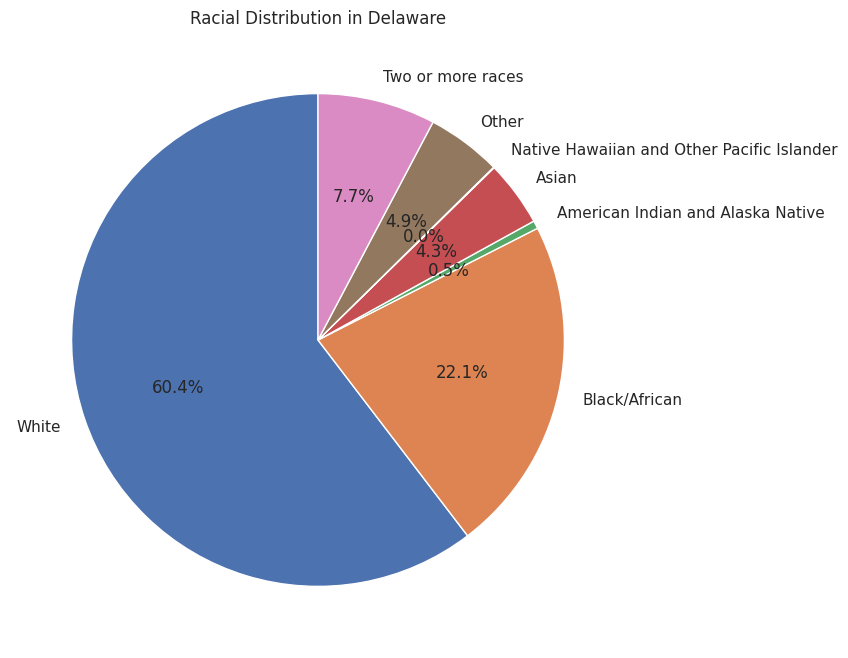

In [36]:
#specifying columns for analyzing race distribution
race_columns = ['White', 'Black/African', 'American Indian and Alaska Native', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Other', 'Two or more races']

#converting column values to numeric for the columns defined above
for column in race_columns:
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

#Plotting the pie chart
state_data = merged_df.iloc[1][race_columns]
state_data.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title(f'Racial Distribution in {merged_df.iloc[1]["State"]}')
plt.ylabel('')  # Hide the y-label
plt.show()



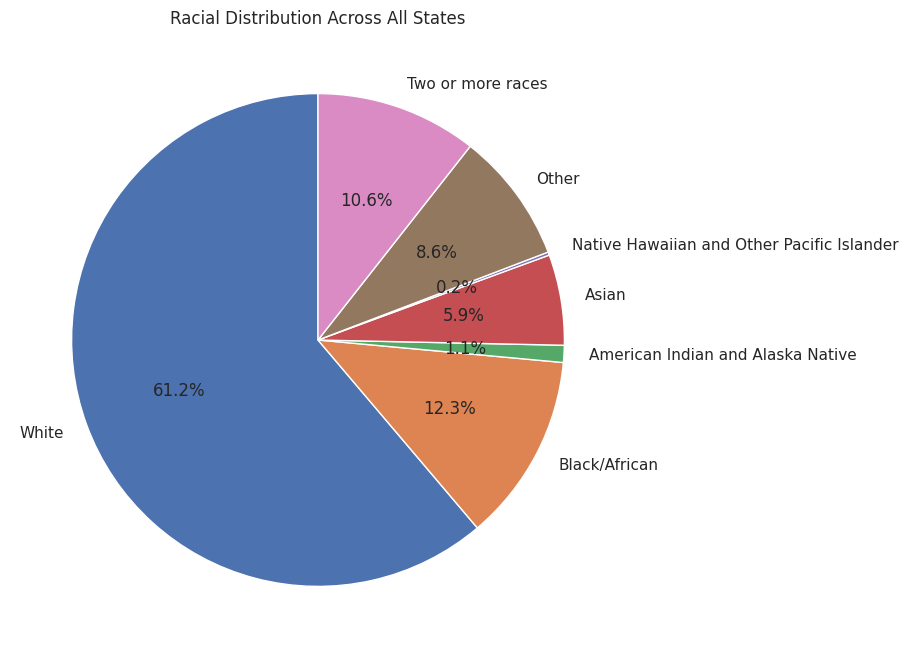

In [37]:
#aggregating the population values from all the states for different races
race_totals = merged_df[race_columns].sum()

# Plotting the data
race_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Racial Distribution Across All States')
plt.ylabel('')  # Hide the y-label
plt.show()

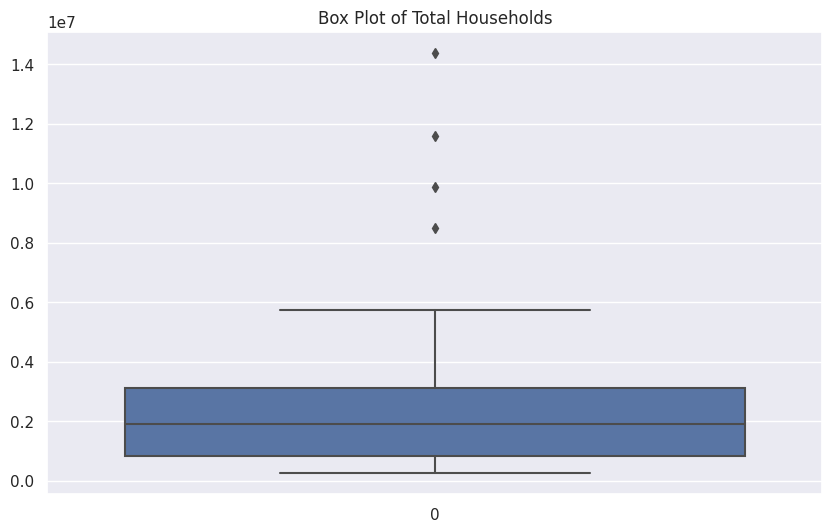

In [38]:
#plottina a box-plot to visualize the distribution of households across the US
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df['Total Households'])
plt.title('Box Plot of Total Households')
plt.show()


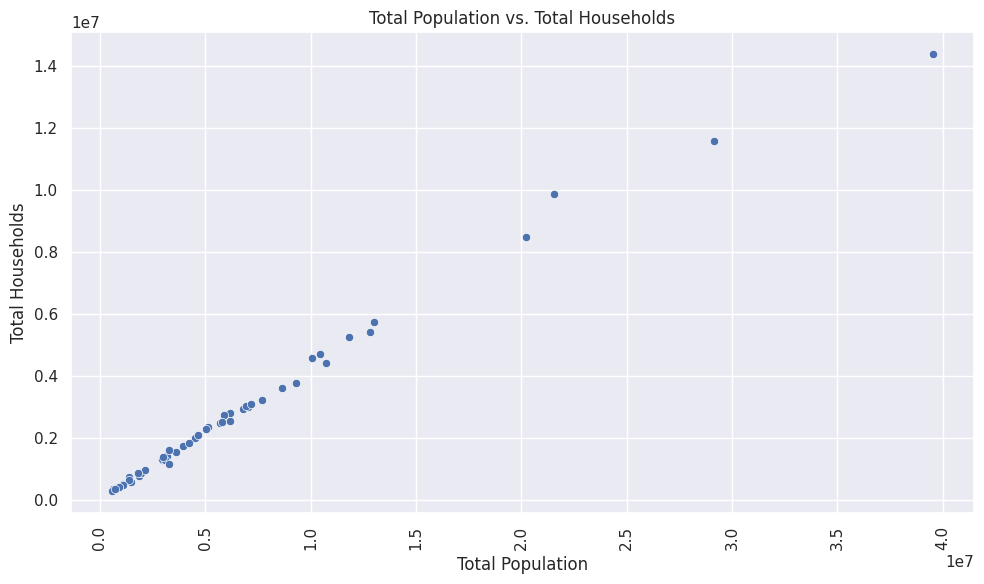

In [39]:
#visualizing relation between population and households by plotting a scatterplot

merged_df['Total Population'] = pd.to_numeric(merged_df['Total Population'], errors='coerce')
merged_df['Total Households'] = pd.to_numeric(merged_df['Total Households'], errors='coerce')

plt.figure(figsize=(10, 6))  # Increase figure size
sns.scatterplot(data=merged_df, x='Total Population', y='Total Households')

# Rotate y-axis labels to prevent overlapping
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.yticks(rotation=0)   # Keep y-axis labels as they are, adjust if necessary

# Set a title and labels for clarity
plt.title('Total Population vs. Total Households')
plt.xlabel('Total Population')
plt.ylabel('Total Households')

# Show the plot
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

In [40]:
pip install jupyter_dash

In [41]:
pip install dash

In [42]:
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import html, dcc

# Creating a Dash application
app = JupyterDash(__name__)

# Define the layout of the app and adding html elements for each of the graph
app.layout = html.Div([
    html.Div(
    dcc.Graph(
        id='race-distribution-pie-chart', #defining thr pie chart
        figure=px.pie(race_totals, values=race_totals.values, names=race_totals.index, title='Racial Distribution Across All States')
    ),
    style={'padding': '20px'}
    ),
    html.Div(
    dcc.Graph(
        id='population-growth-heatmap', #Giving the heatmap id
        figure=px.choropleth(
            df_pop_stats,
            locations='State_Code',
            locationmode='USA-states',
            color='Growth_Rate_Change',
            scope='usa',
            hover_name='State',
            color_continuous_scale=custom_coolwarm,
            title='Growth Rate Change from 2020 to 2021 by State'
        ).update_layout(
            geo=dict(lakecolor='white', showlakes=True, landcolor='lightgray'),
            margin=dict(l=0, r=0, t=50, b=0)
        )
    ),
    style={'padding': '20px'}
    ),
    html.Div(
    dcc.Graph(
        id='population-growth-lineplot', #giving the lineplot id
        figure={
            'data': [
                go.Scatter(
                    x=pivoted_df['MONTH'],
                    y=pivoted_df[column] / 1000000,
                    mode='lines',
                    name=column
                ) for column in list(pivoted_df.columns[1:])
            ],
            'layout': go.Layout(
                title='Population growth for Each Population Type',
                xaxis={'title': 'Month'},
                yaxis={'title': 'Population (in Millions)'},
                legend={'x': 0, 'y': 1},
                hovermode='closest'
            )

        }
    ),
    style={'padding': '20px'}
    )
])

# Running the app
app.run_server(mode='inline')


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>